This is the first of a series of examples related to diffusion. Diffusion tends to make concentrations spatially uniform. Therefore it is only observable when starting concentrations are not already uniform.

We will therefore create a tissue with non-uniform steady-state concentrations in this example. The actual implementation of diffusion will be addressed in the next example.

# Preparation

In [1]:
%matplotlib notebook

/home/jl/Library/Python/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Imports

In [2]:
import multicell
import numpy as np

We will need numpy to define some cell-related properties for all cells, including synthesis rates and initial concentrations.

# Problem definition

## Simulation and tissue structure

For these diffusion-related examples, we will use a tissue comprised of a single file of cells to emphasize how the concentration of a species evolves as you move away from its source, under various sets of assumptions.

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(20, 1, 1, 1e-3)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (0.02 s)


## Biological species

We only need to register a single cell variable to study its concentration.

In [4]:
sim.register_cell_variable("a")

## Constants

We define two constants. s is a vector defining which cells can synthesize species a. A is the synthesis rate of cells that do synthesize a.

In [5]:
s = np.zeros(20)
s[0] = 1
sim.set_constants({"A": 1., "s": s})

## Differential equations

In multicell, the differential equations governing cell variables are defined using Python functions following a certain pattern.

First, the names of input parameters matter, as they will be used by multicell to map cell properties, constants and computed variables defined in the simulation to the input parameters of differential equations.

Second, they must return an array (vector) of values, or something that can be broadcast into an array (e.g. a scalar). 

In this example, A is a scalar and s is an array. Therefore, the return value is an array. The first value will be A, and all the others will be 0.

In [6]:
def da_dt(A, s):
    return A * s

sim.set_ODE("a", da_dt)

We also define initial concentrations. In this example, the steady state is not dependent on initial conditions, so we simply initialize them with a value of 0.

We must first signal multicell that we have finished registering variables.

sim.initialize_cell_variables()

We then create a vector of 0 and use it as initial concentrations for species a.

a0 = np.zeros(20)

sim.set_cell_variable("a", a0)

## Duration

We set the duration of the simulation to an arbitrary value of 1. Since the equation governing a only involves a constant synthesis in one of the cells, the system will never reach a steady state. It is therefore not necessary to run the simulation for long to observe changes.

In [8]:
sim.set_duration(1)

## Rendering

We finally register a renderer for the simulation, whose task will be to plot the concentrations of species a.

In [10]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "a")


# Visualization of the initial state

We can display the concentrations of a using the following command.

<IPython.core.display.Javascript object>


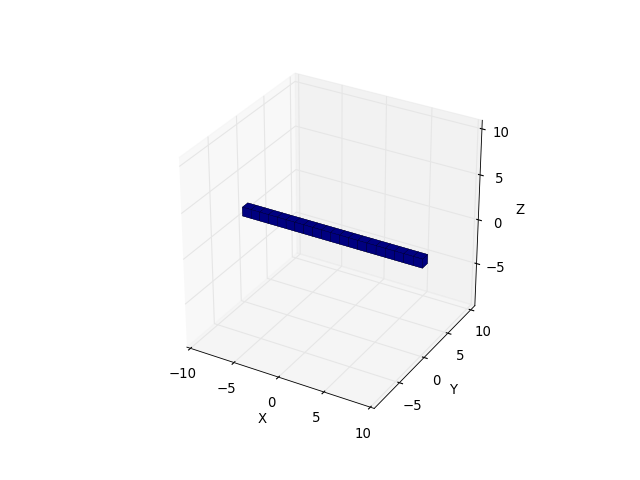

a: from 0.0 to 0.0
Max value displayed for a: 1


In [11]:
sim.renderer.display("a")

As we initialized all concentrations as 0, all cells are dark blue initially.

# Simulation

In order to see the concentrations at the steady state, we run the simulation. The tissue will automatically be rendered at the end.

Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 0.00757503509521 seconds


<IPython.core.display.Javascript object>


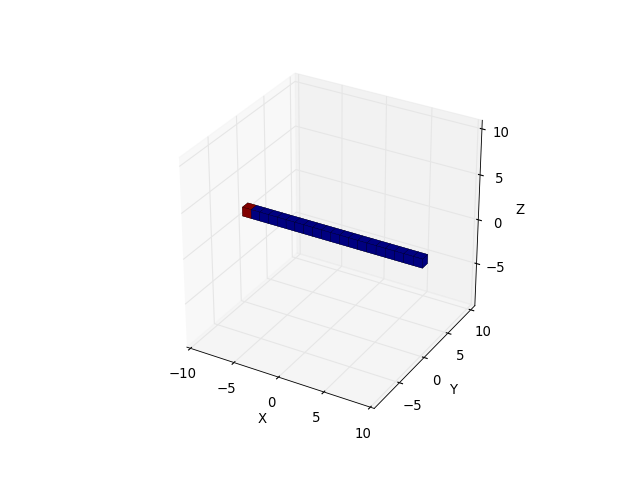

a: from 0.0 to 10000067.8776
Max value displayed for a: 10000067.8776


In [12]:
sim.simulate()

We can see that the left most